In [143]:
import random
import numpy as np
import matplotlib.pyplot as plt


## Investor (Agent) Class:

In [ ]:
class Investor:
  def __init__(self, id, type, sentiment):
    self.id = id         # id for investor
    self.type = type     # rational / non-rational investor
    self.sentiment = sentiment

  def decide(self, price, fundamental):
    if self.type == 'rational':
      if price > fundamental * 1.02:
        return "sell"
      elif price < fundamental * 0.98:
        return "buy"
      else:
        return "hold"
    else:
      if self.sentiment >= 0.6:
        return "buy"
      elif self.sentiment <= 0.4:
        return "sell"     
      else: 
        return "hold"     
  def update_sentiment(self, price_change):
    if self.type == 'non-rational':             
      if price_change >0:
        self.sentiment = min(1.0, self.sentiment + 0.1)
      elif price_change <0:
        self.sentiment = max(0, self.sentiment - 0.1)   # keep the sentiment in [0.1]
      return self.sentiment
      


# Market (Environment) Class:

In [145]:
class Market:
  def __init__(self):
    self.price = 90
    self.fundamental = 100
    self.agents = [Investor(id, 'rational',random.uniform(0.1,1)) for id in range(10)] + \
    [Investor(id, 'non-rational', random.uniform(0.5,0.8)) for id in range(30)]   #no-rational start with high positive sentiment because they see positive trend in price
    self.history = [self.price]

  def step(self):
    last_price = self.price
    buy_pressure, sell_pressure = 0,0

    # Investor decision:
    for agent in self.agents:
      decision = agent.decide(self.price,self.fundamental)
      if decision == 'buy':
        buy_pressure +=1
      elif decision == 'sell':
        sell_pressure +=1

    # Market update:
      net = (buy_pressure - sell_pressure) /len(self.agents)
      sensitivity = 0.12
      self.price = self.price * (1 + net * sensitivity)
      self.history.append(self.price)

    # Agents react to Market:
      price_change = self.price - last_price
      for agent in self.agents:
        agent.update_sentiment(price_change)

  def run(self, step):
    for i in range(step):
      self.step()

## Simulation Loop

In [149]:
m = Market()
m.run(2)

## Plotting

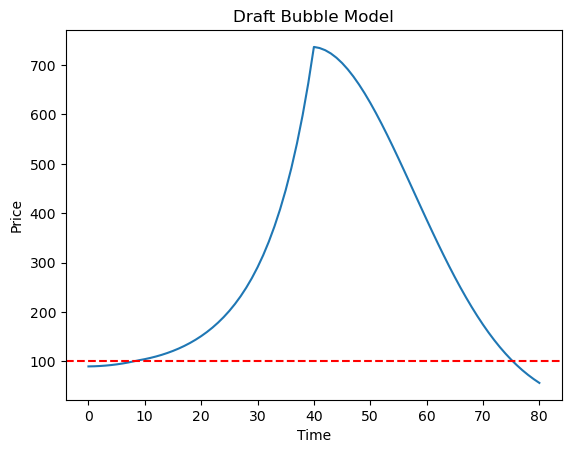

In [150]:


plt.plot(m.history)
plt.axhline(100, color='r', linestyle='--')
plt.title("Draft Bubble Model")
plt.xlabel("Time")
plt.ylabel("Price")
plt.show()

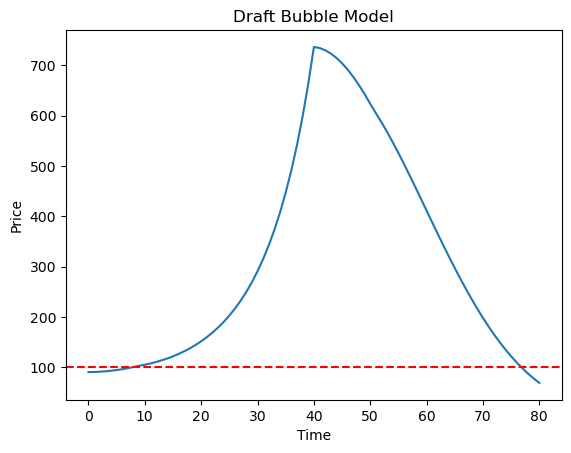

In [ ]:
class Investor:
  def __init__(self, id, type, sentiment):
    self.id = id         # id for investor
    self.type = type     # rational / non-rational investor
    self.sentiment = sentiment

  def decide(self, price, fundamental):
    if self.type == 'rational':
      if price > fundamental * 1.02:
        return "sell"
      elif price < fundamental * 0.98:
        return "buy"
      else:
        return "hold"
    else:
      if self.sentiment >= 0.6:
        return "buy"
      elif self.sentiment <= 0.4:
        return "sell"     
      else: 
        return "hold"     
  def update_sentiment(self, price_change):
    if self.type == 'non-rational':             
      if price_change >0:
        self.sentiment = min(1.0, self.sentiment + 0.05)
      elif price_change <0:
        self.sentiment = max(0, self.sentiment - 0.05)   # keep the sentiment in [0.1]
      return self.sentiment
    
            
class Market:
  def __init__(self):
    self.price = 90
    self.fundamental = 100
    self.agents = [Investor(id, 'rational',random.uniform(0.1,1)) for id in range(10)] + \
    [Investor(id, 'non-rational', random.uniform(0.5,0.8)) for id in range(30)]   #no-rational start with high positive sentiment because they see positive trend in price
    self.history = [self.price]

  def step(self):
    original_price = self.price
    buy_pressure, sell_pressure = 0,0

    # Investor decision:
    for agent in self.agents:
      decision = agent.decide(self.price,self.fundamental)
      if decision == 'buy':
        buy_pressure +=1
      elif decision == 'sell':
        sell_pressure +=1

    # Market update:
      net = (buy_pressure - sell_pressure) /len(self.agents)
      sensitivity = 0.12
      self.price = self.price * (1 + net * sensitivity)
      self.history.append(self.price)

    # Agents react to Market:
      price_change = self.price - original_price
      for agent in self.agents:
        agent.update_sentiment(price_change)

  def run(self, step):
    for i in range(step):
      self.step()
  

m = Market()
m.run(2)

plt.plot(m.history )
plt.axhline(100, color='r', linestyle='--')
plt.title("Draft Bubble Model")
plt.xlabel("Time")
plt.ylabel("Price")
plt.show()


    

  




